# **Group Project - ETL (Extract, Transform, Load)**

### **Group:** 19
### **Business Need:** Best Selling Mobile Phones in Shopee
### **Group Members:** 
### 1. Muhammad Aiman bin Abdollah (A175054) <br>
### 2. Nurin Aisyah Najwa binti Abdul Hamzan (A173478)  <br>
### 3. Nur Hafeezah binti Mohammad Helmee (A177019)<br>
### 4. Nik Nur Liyana binti Nik Muhamed (A176924) <br>


# **Phase 1 - Extract**

In [29]:
# install selenium webdriver

!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [30]:
# import beautifulsoap and selenium

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from time import sleep

In [31]:
# create object for chrome options
chrome_options = Options()
base_url = 'https://shopee.com.my'
path = ['/qqmarketing990?originalCategoryId=100073&page=0&pdpL3Category=0&sortBy=pop', '/qqmarketing990?originalCategoryId=100073&page=1&pdpL3Category=0&sortBy=pop',
        '/qqmarketing990?originalCategoryId=100073&page=2&pdpL3Category=0&sortBy=pop', '/qqmarketing990?originalCategoryId=100073&page=3&pdpL3Category=0&sortBy=pop']

# set chrome driver options to disable any popup's from the website
# to find local path for chrome profile, open chrome browser
# and in the address bar type, "chrome://version"
chrome_options.add_argument('--headless')
chrome_options.add_argument('disable-notifications')
chrome_options.add_argument('start-maximized')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# to disable the message, "Chrome is being controlled by automated test software"
chrome_options.add_argument("disable-infobars")

# pass the argument 1 to allow and 2 to block
chrome_options.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 2
    })

# invoke the webdriver
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: use options instead of chrome_options


In [32]:
# declare empty lists to store url
item_link =[]
page_count = 1

for page in path:

  browser.get(base_url+page)
  delay = 5 #seconds

  while True:
      try:
          WebDriverWait(browser, delay)
          print('Page {} is ready'.format(page_count)) #debug
          page_count += 1
          sleep(5)
          html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
          soup = BeautifulSoup(html, "html.parser")

          # find the class that store product
          product_item= soup.find_all('div', class_='shop-search-result-view__item col-xs-2-4')
          #scrap each product in product_item
          for item in product_item:
            link = item.find('a').get('href')
            item_link.append(base_url+link)
        
          break # it will break from the loop once the specific element will be present. 
      except TimeoutException:
          print ("Loading took too much time!-Try again")

Page 1 is ready
Page 2 is ready
Page 3 is ready
Page 4 is ready


In [33]:
len(item_link)

120

In [34]:
all_product= []
item_count=1

for link in item_link:

  browser.get(link)
  delay = 5 #secods

  while True:
      try:
          WebDriverWait(browser, delay)
          sleep(5)
          html = browser.execute_script("return document.getElementsByTagName('html')[0].innerHTML")
          #print(html)
          soup = BeautifulSoup(html, "html.parser")

          # list to temporary store product details
          product_details = []
          
          # attribute: product name
          item_n = soup.find('div', class_="_3g8My-")
          name = item_n.find('span')
          product_details.append(name.text)
          
          #attribute: price
          price = soup.find('div', class_="_2v0Hgx")
          product_details.append(price.text)

          #attribute: product brand
          item_shop_b = soup.find_all('span', class_="_1w3mKA")[2]
          product_details.append(item_shop_b.text)
            
          #attribute: number of product sold
          sold = soup.find('div', class_="_3b2Btx")
          product_details.append(sold.text)
          
          # attribute: number of product favorite
          item_f = soup.find('div', class_="flex items-center _3oXgUo")
          favorite = item_f.find('div', class_='Rs4O3p')
          if favorite:
            product_details.append(favorite.text)
          else:
            product_details.append(0)

          #attribute: rating & number of rating 
          #there are from same class name.
          for rating in soup.find_all('div', class_="_3uBhVI"):
            product_details.append(rating.text)
          
          #store product details in all_product list
          all_product.append(product_details)
          print('Item {} is ready'.format(item_count)) # debug
          item_count += 1

          break # it will break from the loop once the specific element will be present. 
      except TimeoutException:
          print ("Loading took too much time!-Try again")

Item 1 is ready
Item 2 is ready
Item 3 is ready
Item 4 is ready
Item 5 is ready
Item 6 is ready
Item 7 is ready
Item 8 is ready
Item 9 is ready
Item 10 is ready
Item 11 is ready
Item 12 is ready
Item 13 is ready
Item 14 is ready
Item 15 is ready
Item 16 is ready
Item 17 is ready
Item 18 is ready
Item 19 is ready
Item 20 is ready
Item 21 is ready
Item 22 is ready
Item 23 is ready
Item 24 is ready
Item 25 is ready
Item 26 is ready
Item 27 is ready
Item 28 is ready
Item 29 is ready
Item 30 is ready
Item 31 is ready
Item 32 is ready
Item 33 is ready
Item 34 is ready
Item 35 is ready
Item 36 is ready
Item 37 is ready
Item 38 is ready
Item 39 is ready
Item 40 is ready
Item 41 is ready
Item 42 is ready
Item 43 is ready
Item 44 is ready
Item 45 is ready
Item 46 is ready
Item 47 is ready
Item 48 is ready
Item 49 is ready
Item 50 is ready
Item 51 is ready
Item 52 is ready
Item 53 is ready
Item 54 is ready
Item 55 is ready
Item 56 is ready
Item 57 is ready
Item 58 is ready
Item 59 is ready
Item 6

In [35]:
all_product[0]

['(FREE SHIPPING) SAMSUNG S20 PRO (8GB+512GB) MOBILE PHONE',
 'RM186.12 - RM205.92',
 'Samsung',
 '466',
 'Favorite (328)',
 '3.9',
 '23']

In [36]:
# close the automated browser
browser.close()

In [37]:
import pandas as pd

df = pd.DataFrame(data=all_product, columns=['product_name', 'product_price', 'brand', 'num_sold', 'num_fav', 'product_rating', 'num_rating'])               
df.head(120)

,product_name,product_price,brand,num_sold,num_fav,product_rating,num_rating
0,(FREE SHIPPING) SAMSUNG S20 PRO (8GB+512GB) MO...,RM186.12 - RM205.92,Samsung,466,Favorite (328),3.9,23
1,[CLEARANCE STOCK] VIVO Y50 8GB/512GB ANDROID S...,RM186.12 - RM205.92,Vivo,7,Favorite (9),5.0,2
2,[CLEARANCE STOCK] OPPO RENO 4 PRO 12GB RAM+512...,RM238.00 - RM253.00,OPPO,6,Favorite (7),3.5,4
3,[CLEARANCE STOCK] SAMSUNG GALAXY S21+ 5G 12GB ...,RM223.00,Other Brands,3,Favorite (4),5.0,1
4,[CLEARANCE STOCK] VIVO Y19 (8GB/512GB) IMPORT SET,RM188.00 - RM208.00,Vivo,3,Favorite (10),3.0,1
...,...,...,...,...,...,...,...
115,[CLEARANCE STOCK] HUAWEI P30 PRO 8GB RAM 512GB...,RM188.00 - RM208.00,Huawei,0,0,None,None
116,[CLEARANCE STOCK] Redmi 6A Dual SIM Dual Stand...,RM197.00,Other Brands,0,0,None,None
117,[CLEARANCE STOCK] ORIGINAL NOKIA 150 DUAL SIM ...,RM159.00,Nokia,0,0,None,None
118,[CLEARANCE STOCK] Oppo A53 4G 2gb+16gb Origina...,RM189.00,OPPO,0,0,None,None


# **Phase 2 - Transform**

# **a. Data Cleaning / Data Transformation**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_name    120 non-null    object
 1   product_price   120 non-null    object
 2   brand           120 non-null    object
 3   num_sold        120 non-null    object
 4   num_fav         120 non-null    object
 5   product_rating  13 non-null     object
 6   num_rating      13 non-null     object
dtypes: object(7)
memory usage: 6.7+ KB


### **1. Remove Irrelevant Word in Product Name**

In [40]:
df['product_name']

0      (FREE SHIPPING) SAMSUNG S20 PRO (8GB+512GB) MO...
1      [CLEARANCE STOCK] VIVO Y50 8GB/512GB ANDROID S...
2      [CLEARANCE STOCK] OPPO RENO 4 PRO 12GB RAM+512...
3      [CLEARANCE STOCK] SAMSUNG GALAXY S21+ 5G 12GB ...
4      [CLEARANCE STOCK] VIVO Y19 (8GB/512GB) IMPORT SET
                             ...                        
115    [CLEARANCE STOCK] HUAWEI P30 PRO 8GB RAM 512GB...
116    [CLEARANCE STOCK] Redmi 6A Dual SIM Dual Stand...
117    [CLEARANCE STOCK] ORIGINAL NOKIA 150 DUAL SIM ...
118    [CLEARANCE STOCK] Oppo A53 4G 2gb+16gb Origina...
119    [CLEARANCE STOCK] Oppo A37 4G 2gb+16gb Origina...
Name: product_name, Length: 120, dtype: object

In [41]:
import re

# remove irrelevant value in product name
df['product_name'] = df['product_name'].str.replace(r"FREE SHIPPING", '', regex=True)
df['product_name'] = df['product_name'].str.replace(r"CLEARANCE STOCK", '', regex=True)
df['product_name'] = df['product_name'].str.split(n=1).str[1]
df['product_name'] = df['product_name'].str.lower()
df['product_name'].head()

0             samsung s20 pro (8gb+512gb) mobile phone
1               vivo y50 8gb/512gb android smart phone
2    oppo reno 4 pro 12gb ram+512gb rom 6.5 inch sc...
3    samsung galaxy s21+ 5g 12gb ram 512gb rom 6.5 ...
4                      vivo y19 (8gb/512gb) import set
Name: product_name, dtype: object

### **2. Handle None Value and Change Data Type for Number of Rating and Product Rating**

In [42]:
df['product_rating'].fillna(0, inplace = True) 
df['num_rating'].fillna(0, inplace = True) 
df['product_rating'] = df['product_rating'].astype(float)
df['num_rating'] = df['num_rating'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    120 non-null    object 
 1   product_price   120 non-null    object 
 2   brand           120 non-null    object 
 3   num_sold        120 non-null    object 
 4   num_fav         120 non-null    object 
 5   product_rating  120 non-null    float64
 6   num_rating      120 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 6.7+ KB


### **3. Remove "Favorite" word and Change Data Type for Number of Favorite**

In [43]:
df['num_fav'].head()

0    Favorite (328)
1      Favorite (9)
2      Favorite (7)
3      Favorite (4)
4     Favorite (10)
Name: num_fav, dtype: object

In [44]:
df['num_fav'] = df['num_fav'].str.replace(r'[Favorite\(\)]', '', regex=True)
df['num_fav'].fillna('0', inplace = True) 
df['num_fav'] = df['num_fav'].astype(int)
df['num_fav']

0      328
1        9
2        7
3        4
4       10
      ... 
115      0
116      0
117      0
118      0
119      0
Name: num_fav, Length: 120, dtype: int64

### **4. Change Brand Name to Lowercase**

In [45]:
df['brand'].head()

0         Samsung
1            Vivo
2            OPPO
3    Other Brands
4            Vivo
Name: brand, dtype: object

In [46]:
df['brand'] = df['brand'].str.lower()
df['brand'].head()

0         samsung
1            vivo
2            oppo
3    other brands
4            vivo
Name: brand, dtype: object

### **5. Remove 'RM' and Change Data Type for Price**

In [47]:
df['product_price'].head()

0    RM186.12 - RM205.92
1    RM186.12 - RM205.92
2    RM238.00 - RM253.00
3               RM223.00
4    RM188.00 - RM208.00
Name: product_price, dtype: object

In [48]:
import re

# remove 'RM' from product price
df['product_price'] = df['product_price'].str.replace(r'RM', '', regex=True)

# this is a fnction to convert price range to single price
def single_price(row):
  if bool(re.search(r'\-', row)):
    price1, price2 = map(float, row.split('-'))
    return '{:.2f}'.format((price1+price2)/2)
  else:
    return row

df['product_price'] = df['product_price'].apply(single_price).astype(float)

In [49]:
df['product_price'].head()

0    196.02
1    196.02
2    245.50
3    223.00
4    198.00
Name: product_price, dtype: float64

### **6. Change Data Type for Number of Sold**

In [50]:
df['num_sold'] = df['num_sold'].astype(int)

In [67]:
df['num_sold'].head()

0    466
1      7
2      6
3      3
4      3
Name: num_sold, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    120 non-null    object 
 1   product_price   120 non-null    float64
 2   brand           120 non-null    object 
 3   num_sold        120 non-null    int64  
 4   num_fav         120 non-null    int64  
 5   product_rating  120 non-null    float64
 6   num_rating      120 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 6.7+ KB


In [52]:
df.head()

,product_name,product_price,brand,num_sold,num_fav,product_rating,num_rating
0,samsung s20 pro (8gb+512gb) mobile phone,196.02,samsung,466,328,3.9,23
1,vivo y50 8gb/512gb android smart phone,196.02,vivo,7,9,5.0,2
2,oppo reno 4 pro 12gb ram+512gb rom 6.5 inch sc...,245.50,oppo,6,7,3.5,4
3,samsung galaxy s21+ 5g 12gb ram 512gb rom 6.5 ...,223.00,other brands,3,4,5.0,1
4,vivo y19 (8gb/512gb) import set,198.00,vivo,3,10,3.0,1


# **Visualization**

In [53]:
# import necessary library for data visualization

%matplotlib inline
import matplotlib.pyplot as plt

### **1. Bar Chart for No. of Mobile Phone by Brand**

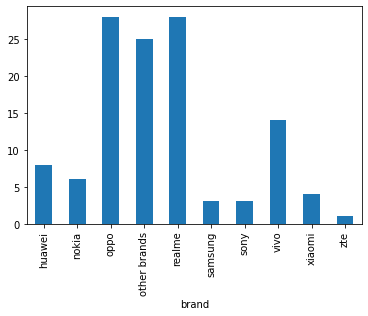

In [54]:
df.groupby('brand').size().plot.bar()

### **2. Pie Chart for No. of Sold by Brand**

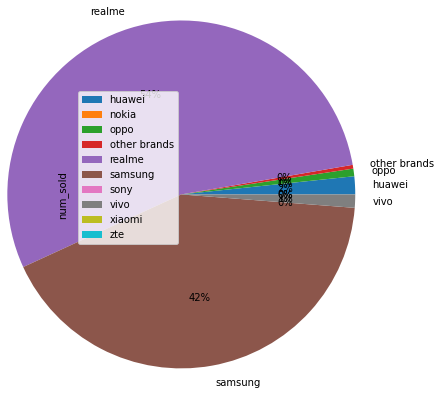

In [56]:
df.groupby(['brand']).sum().plot(kind='pie', y='num_sold',autopct='%1.0f%%',radius=2)

### **3. Box Plot for Product Price (Before & After Cleaning)**

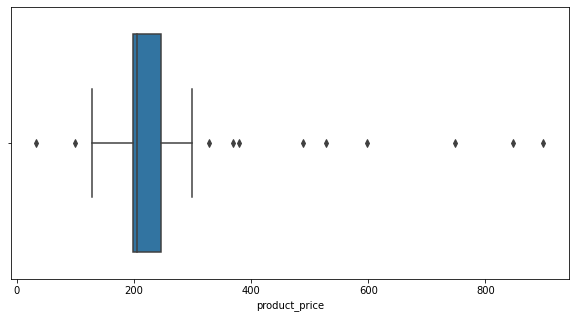

In [57]:
# box plot for product price before remove outliers

import seaborn as sns
price = df['product_price']

plt.figure(figsize=(10,5))
sns.boxplot(x=price) #boxplot using seaborn

In [58]:
#function to calculate boxplot
def find_boundaries(df, col):
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_boundary=Q1- 1.5*IQR
  upper_boundary=Q3+ 1.5*IQR

  return lower_boundary, upper_boundary

In [59]:
import numpy as np

lower_bound, upper_bound = find_boundaries(df,'product_price')
print('lower boundary: ',lower_bound)
print('upper boundary: ', upper_bound)

df['product_price']=np.where(df['product_price']>upper_bound, upper_bound,
                          np.where(df['product_price']<lower_bound, lower_bound, df['product_price']))

lower boundary:  126.75
upper boundary:  316.75


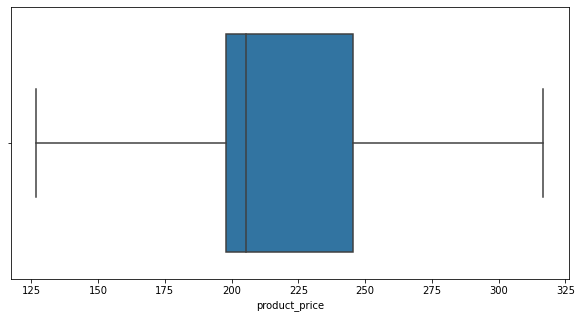

In [60]:
# box plot for product price after remove outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=price)

### **4. Correlation Between Number of Rating and Product Rating**

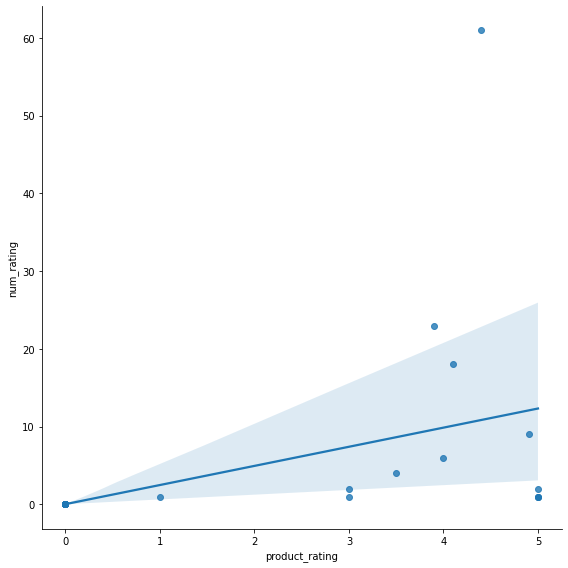

In [65]:
sns.lmplot(x='product_rating',y='num_rating',data=df,fit_reg=True, height=8)

### **5. Correlation Between Favourite Number and Sold Number**

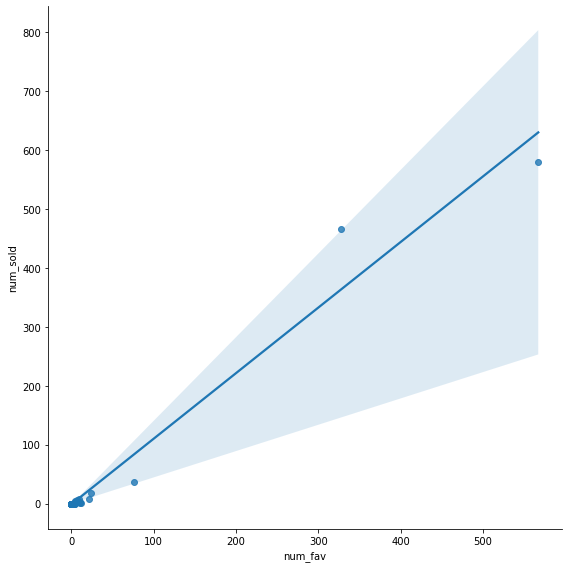

In [62]:
sns.lmplot(x='num_fav',y='num_sold',data=df,fit_reg=True, height=8)

# **Phase 3 - Load**

In [66]:
# store the data into csv file
df.to_csv(r'G19_mobile_phone.csv')